Doğruluk : 0.9590643274853801
confusion_matrix : 
 [[ 59   4]
 [  3 105]]


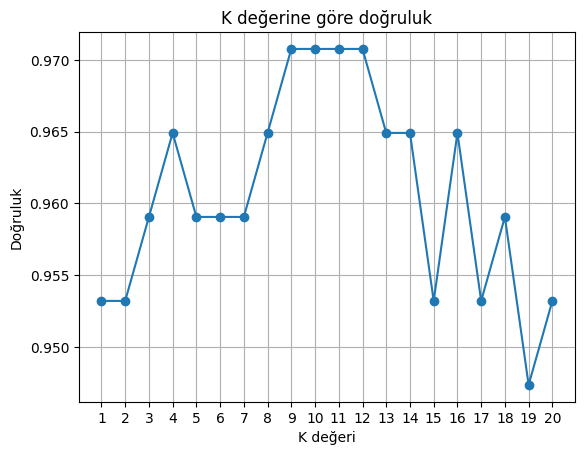

In [1]:
# sklearn: ML Library
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# (1) Veri Seti İncelemesi
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

# (2) Makine Öğrenmesi Modelinin Seçilmesi - KNN Sınıflandırıcı
# (3) Modelin Train Edilmesi
X = cancer.data #features
y = cancer.target #target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#.fit()
#.transform()
X_test = scaler.transform(X_test)

# knn modeli oluştur ve train et
# knn = KNeighborsClassifier() # Model oluşturma - komşu parametresini unutma ***
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) # fit fonksiyonu verimizi (samples + target) kullanarak knn algoritmasını eğitir

# (4) Sonuçların Değerlendirilmesi : test
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk :", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("confusion_matrix :", "\n", conf_matrix)

# (5) Hiperparametre Ayarlanması
"""
    KNN: Hyperparameter = K
         K:         1,  2,  3 ... N
         Accuracy: %A, %B, %C ... %-
"""
accuracy_values = []
k_values = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)

plt.figure()
plt.plot(k_values, accuracy_values, marker="o", linestyle="-")
plt.title("K değerine göre doğruluk")
plt.xlabel("K değeri")
plt.ylabel("Doğruluk")
plt.xticks(k_values)
plt.grid(True)